In [2]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
random.seed(37)

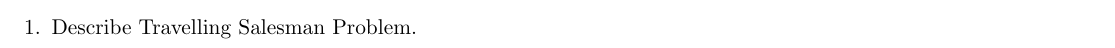


The Traveling Salesman Problem (TSP) is a classic problem in combinatorial optimization and computer science. It can be stated as follows:

Given a list of cities and the distances between each pair of cities, the task is to find the shortest possible route that visits each city exactly once and returns to the original city (salesman's home city).

The TSP is a well-known NP-hard problem, meaning that there is no known polynomial-time algorithm to solve it optimally for all possible instances. Therefore, researchers have developed various heuristic and approximation algorithms to find near-optimal solutions efficiently. One such algorithm is Simulated Annealing.

The importance of the TSP goes beyond its theoretical interest, as it has numerous practical applications in various fields, including: Logistics and Transportation, Manufacturing and Production Telecommunications, Computer Science and Operations Research

The TSP can be formulated as a graph optimization problem, where cities are represented as nodes (vertices) and the distances between cities are represented as edges (weighted or unweighted). The goal is to find a Hamiltonian cycle (a cycle that visits each node exactly once) with the minimum possible weight.

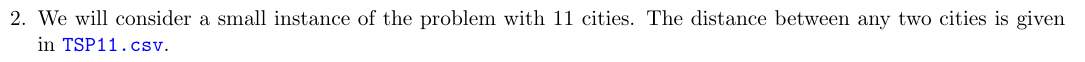

In [3]:
distances = pd.read_csv("TSP11.csv", index_col=None, header=None)


In [4]:
distances

,0,1,2,3,4,5,6,7,8,9,10
0,0,29,20,21,16,31,100,12,4,31,18
1,29,0,15,29,28,40,72,21,29,41,12
2,20,15,0,15,14,25,81,9,23,27,13
3,21,29,15,0,4,12,92,12,25,13,25
4,16,28,14,4,0,16,94,9,20,16,22
5,31,40,25,12,16,0,95,24,36,3,37
6,100,72,81,92,94,95,0,90,101,99,84
7,12,21,9,12,9,24,90,0,15,25,13
8,4,29,23,25,20,36,101,15,0,35,18
9,31,41,27,13,16,3,99,25,35,0,38


In [5]:
dist = distances.values

In [6]:
num_cities = len(dist)

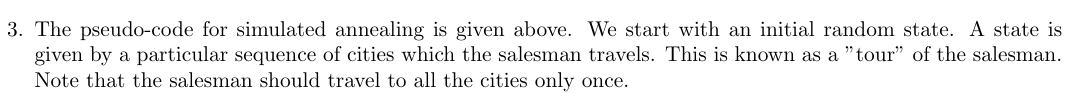

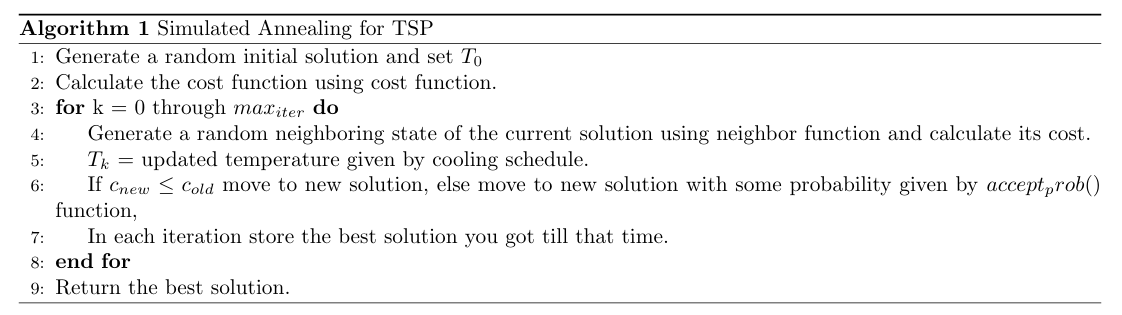

In [7]:
# my psuedo code for simulated annealing. This solution must be a valid tour.
# We can start with any initialization, even , 0,1,2,3,....n,0, BUT
# It is better we start with a good guess.




```
current_tour = generate_initial_tour(cities)
current_cost cost = cost(current_tour)
T = T0  # initial temperature
for k in range(max_iter):
  neigbouring_state = neigbour(current_tour)
  neighbouring_cost = cost(neighbouring_state)
  T = cooling_schedule(T)
  if neighbouring_cost <= current_cost:
    current_tour = neighbouring_state
    current_cost = neighbouring_cost
  else:
    prob = get_acceptance_prob(old, new, T)
    if prob > np.random.uniform(0,1):
      current_tour = neighbouring_state
      current_cost = neighbouring_cost

```



In [8]:
def generate_initial_tour(cities):
    return random.sample(cities, len(cities))

In [9]:
generate_initial_tour([1,2,3,4])

[1, 3, 4, 2]

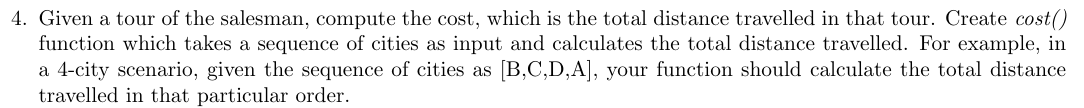

In [10]:
distances

,0,1,2,3,4,5,6,7,8,9,10
0,0,29,20,21,16,31,100,12,4,31,18
1,29,0,15,29,28,40,72,21,29,41,12
2,20,15,0,15,14,25,81,9,23,27,13
3,21,29,15,0,4,12,92,12,25,13,25
4,16,28,14,4,0,16,94,9,20,16,22
5,31,40,25,12,16,0,95,24,36,3,37
6,100,72,81,92,94,95,0,90,101,99,84
7,12,21,9,12,9,24,90,0,15,25,13
8,4,29,23,25,20,36,101,15,0,35,18
9,31,41,27,13,16,3,99,25,35,0,38


In [11]:
def cost(cities):
  c = 0
  for i in range(len(cities)-1):
    c+= dist[cities[i], cities[i+1]]
  c += dist[cities[-1], cities[0]]
  return c


print(cost([3,2,1])) #this should print 59

59


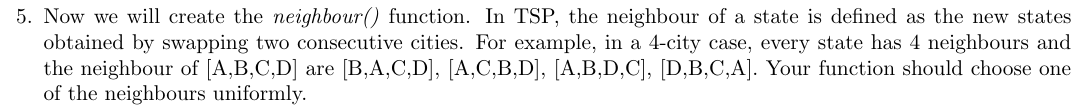

In [12]:
def neighbour(current_tour):
    #select random indice and a consecutive.
    i = random.randint(0, len(current_tour) - 1)
    j = (i + 1)%len(current_tour)
    # Create a new tour by swapping the cities at indices i and j
    new_tour = current_tour.copy()
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    return new_tour

neighbour([0,1,2,3])  #should swap consecutive

[3, 1, 2, 0]

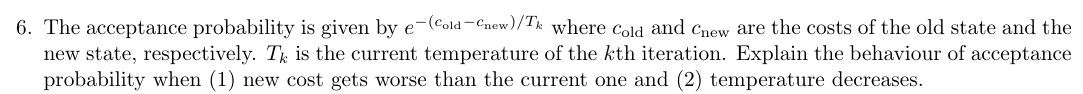

In [13]:
def get_acceptance_prob(new, old, T):
  delta = old-new
  return np.exp(delta/T)

Explain the behaviour of acceptance probability when (1) new cost gets worse than the current one and (2) temperature decreases.

When the new cost gets worse than the current one:

In this scenario, the acceptance probability will decrease as the difference between the new cost and the current cost (cold - cnew) increases. A larger difference in costs will result in a smaller acceptance probability, making it less likely to accept the worse solution. This difference is also divide by Temperature, hence if temperature is high, the proabability will not be that low, ensuring that the algorithm tends to avoid worsening solutions but still allows for some exploration to escape local optima. But once temperatures lower down, the probability will decrease if new cost is worse, resulting in not accepting the new solution.

When the temperature decreases:
As the temperature decreases, the acceptance probability decreases as well. A lower temperature leads to a smaller acceptance probability, making it less likely to accept worse solutions as the optimization process progresses. This behavior reflects the cooling process in simulated annealing, where the algorithm gradually becomes more selective in accepting worse solutions as it approaches convergence.


In [16]:
# Test scenario 1: New cost gets worse than the current one
cold = 10  # Current cost
cnew = 15  # New cost (worse than current)
temperature = 1  # Temperature

prob_scenario1 = get_acceptance_prob(cnew, cold, temperature)
print("Acceptance probability (Scenario 1):", prob_scenario1)

Acceptance probability (Scenario 1): 0.006737946999085467


In [17]:
# Test scenario 2: Temperature decreases
cold = 5  # Current cost
cnew = 10   # New cost (worse than current)
temperatures = [10, 5, 1]  # Decreasing temperatures

prob_scenario2 = [get_acceptance_prob(cnew, cold, temp) for temp in temperatures]
print("Acceptance probabilities (Scenario 2):", prob_scenario2)

Acceptance probabilities (Scenario 2): [0.6065306597126334, 0.36787944117144233, 0.006737946999085467]


Note here, that when temperature was high (see 10), if for worse new cost the probability was 0.6, but as temperature lowers, the probability of accepting worse solutions also lowers down (see for 1, we got 0.006 probability).

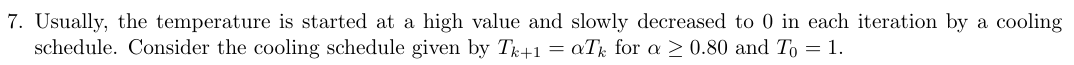

In [18]:
def cooling_schedule1(T, alpha):
  return alpha*T

Clearly, $\alpha$ must be between 0.8 and 1, otherwise temperature will not decrease to 0 (will not cool down!)

In [28]:
T0 = 1
alpha = 0.999

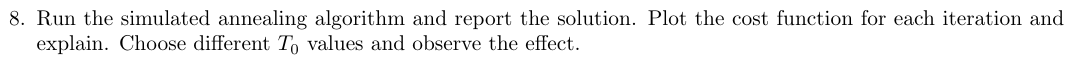

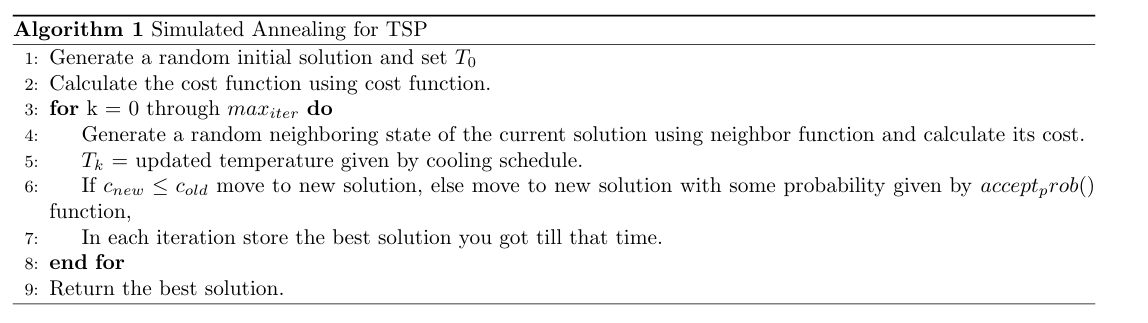

In [29]:
def simulated_annealing(T0, max_iter):
  cities = list(range(num_cities))
  current_tour = generate_initial_tour(cities)
  current_cost = cost(current_tour)
  best_tour = current_tour.copy()
  best_cost = current_cost
  T = T0  # initial temperature
  cost_store = []
  for k in range(max_iter):
    new_tour = neighbour(current_tour)
    new_cost = cost(new_tour)
    T = cooling_schedule1(T, alpha)
    if new_cost <= current_cost:
      current_tour = new_tour
      current_cost = new_cost
    else:
      prob = get_acceptance_prob(new_cost, current_cost, T)
      if prob > np.random.rand():
        current_tour = new_tour
        current_cost = new_cost
    if current_cost < best_cost:
      best_cost = current_cost
      best_tour = current_tour
    cost_store.append(current_cost)
  if min(cost_store) != best_cost:
    print(f"Assertion error for temperature {T0}, best cost = {best_cost}, min cost = {min(cost_store)}")
  return best_tour, best_cost, cost_store

In [30]:
best_tour, best_cost, cost_store = simulated_annealing(1, 1000)

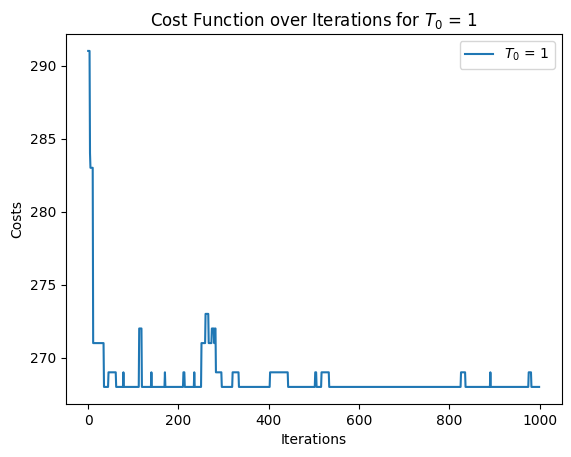

In [31]:
plt.plot(list(range(len(cost_store))), cost_store, label = f"$T_0$ = {T0}")
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.title("Cost Function over Iterations for $T_0$ = 1")
plt.legend()
plt.show()


In [32]:
best_tour

[6, 1, 7, 4, 3, 5, 9, 0, 8, 10, 2]

In [33]:
best_cost

268

Now we run for multiple temperature and see

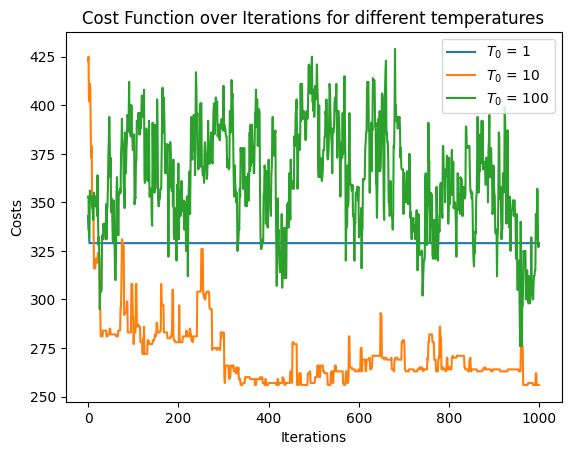

In [34]:
temps = [1,10,100]
for temp in temps:
  best_tour, best_cost, cost_store = simulated_annealing(temp, 1000)
  plt.plot(list(range(len(cost_store))), cost_store, label = f"$T_0$ = {temp}")
  plt.xlabel("Iterations")
  plt.ylabel("Costs")
plt.title("Cost Function over Iterations for different temperatures")
plt.legend()
plt.show()

We observe that 10 is better. We further explore the range from 0 to 200 and plot the best cost against each temperature

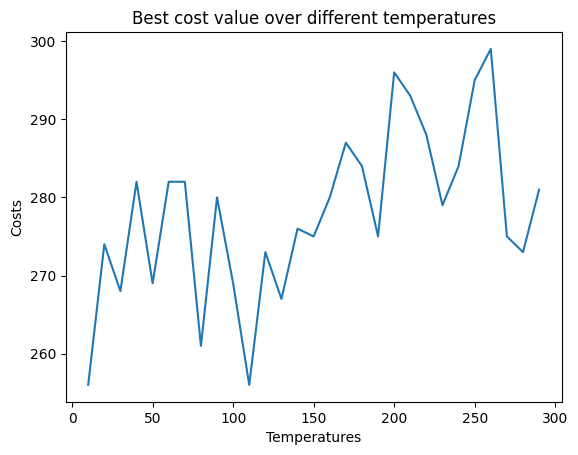

In [38]:
temps = list(range(10,300,10))
temperature_costs = []
for temp in temps:
  best_tour, best_cost, cost_store = simulated_annealing(temp, 1000)
  temperature_costs.append(best_cost)
plt.plot(temps, temperature_costs)
plt.xlabel("Temperatures")
plt.ylabel("Costs")
plt.title("Best cost value over different temperatures")
plt.show()

In [39]:
best_temp = temps[np.argmin(np.array(temperature_costs))]

In [40]:
print(f"Best cost for T0 =  {best_temp} is: ", min(temperature_costs))

Best cost for T0 =  10 is:  256


We observe that 10 and 110 are a better temperature value to choose as they are giving lowest cost. Number of iterations are 1000.

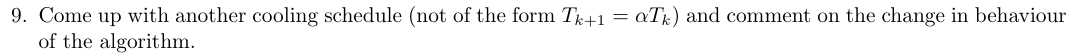

What we already tried is the exponential cooling, now we can try what is called linear cooling.

The temperature is decreased linearly at each iteration until it reaches a minimum temperature.
Example formula: $T_k = 0.1 + max(T_0 - k * δ,0)$, where $T_k$ is the temperature at iteration k, $T_0$ is the initial temperature, and $δ$ is the cooling rate. We add 0.1 becuase it should not return 0, we will encounter divide by zero error. We return a minimum temperature of 0.1

In [46]:
def cooling_schedule2(T0, k, delta):
  return 0.1 + max(T0-k*delta, 0)

In [52]:
def simulated_annealing(T0, max_iter):
  cities = list(range(num_cities))
  current_tour = generate_initial_tour(cities)
  current_cost = cost(current_tour)
  best_tour = current_tour.copy()
  best_cost = current_cost
  T = T0  # initial temperature
  cost_store = []
  for k in range(1, max_iter+1):
    new_tour = neighbour(current_tour)
    new_cost = cost(new_tour)
    T = cooling_schedule2(T0, k, 0.01)
    if new_cost <= current_cost:
      current_tour = new_tour
      current_cost = new_cost
    else:
      prob = get_acceptance_prob(new_cost, current_cost, T)
      if prob > np.random.rand():
        current_tour = new_tour
        current_cost = new_cost
    if current_cost < best_cost:
      best_cost = current_cost
      best_tour = current_tour
    cost_store.append(current_cost)
  if min(cost_store) != best_cost:
    print(f"Assertion error for temperature {T0}, best cost = {best_cost}, min cost = {min(cost_store)}")
  return best_tour, best_cost, cost_store

In [53]:
best_tour, best_cost, cost_store = simulated_annealing(1, 1000)

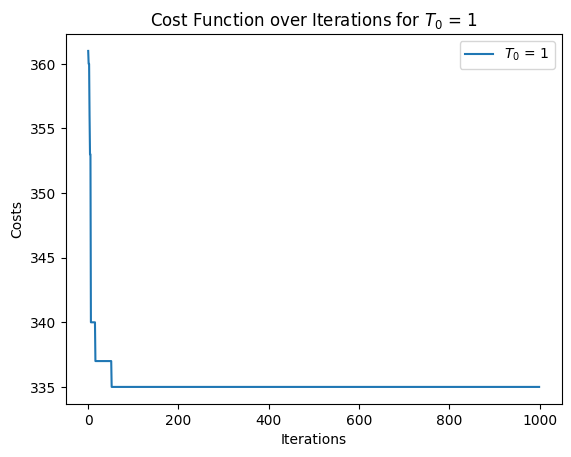

In [54]:
plt.plot(list(range(len(cost_store))), cost_store, label = f"$T_0$ = {T0}")
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.title("Cost Function over Iterations for $T_0$ = 1")
plt.legend()
plt.show()


In [55]:
best_tour

[10, 1, 0, 3, 5, 6, 2, 9, 4, 7, 8]

In [56]:
best_cost

335

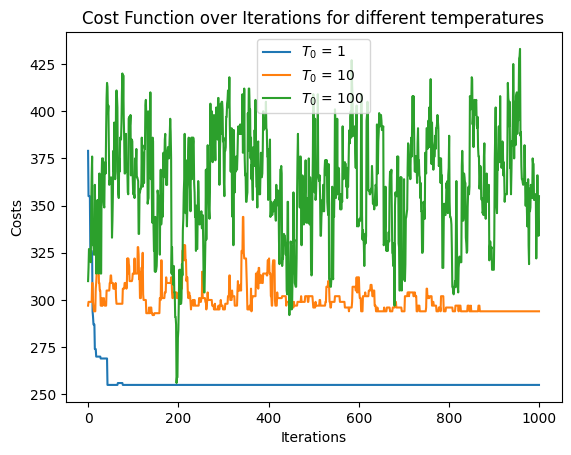

In [57]:
temps = [1,10,100]
for temp in temps:
  best_tour, best_cost, cost_store = simulated_annealing(temp, 1000)
  plt.plot(list(range(len(cost_store))), cost_store, label = f"$T_0$ = {temp}")
  plt.xlabel("Iterations")
  plt.ylabel("Costs")
plt.title("Cost Function over Iterations for different temperatures")
plt.legend()
plt.show()

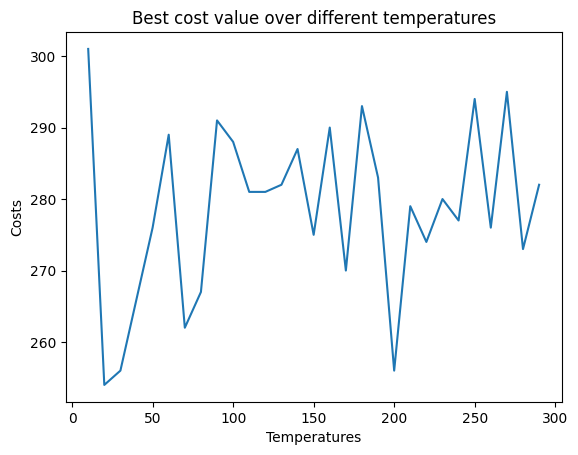

In [58]:
temps = list(range(10,300,10))
temperature_costs = []
for temp in temps:
  best_tour, best_cost, cost_store = simulated_annealing(temp, 1000)
  temperature_costs.append(best_cost)
plt.plot(temps, temperature_costs)
plt.xlabel("Temperatures")
plt.ylabel("Costs")
plt.title("Best cost value over different temperatures")
plt.show()

In [59]:
best_temp = temps[np.argmin(np.array(temperature_costs))]

In [60]:
print(f"Best cost for T0 =  {best_temp} is: ", min(temperature_costs))

Best cost for T0 =  20 is:  254


We see that with this new cooling strategy for temperature 20, we get better cost compared to all other previous results, lowest we have been able to get is 254.

This cooling schedule decreases the temperature slowly as the algorithm progresses, allowing for more exploration of the solution space in the early stages and more exploitation of promising regions in the later stages.

Compared to the exponential cooling schedule, which decreases the temperature exponentially, the logarithmic cooling schedule provides a smoother decrease in temperature. This can lead to a more balanced exploration-exploitation trade-off throughout the optimization process. Additionally, the logarithmic cooling schedule may be more suitable for problems with complex and rugged search landscapes, where a rapid decrease in temperature could lead to premature convergence to suboptimal solutions.

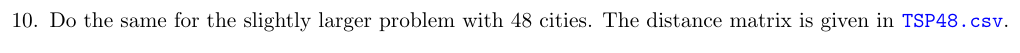

In [61]:
distances = pd.read_csv("TSP48.csv", index_col=None, header=None)

In [62]:
distances

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,4727,1205,6363,3657,3130,2414,563,463,5654,...,3530,825,2188,4820,3489,1947,6835,1542,2379,3744
1,4727,0,3588,2012,1842,6977,6501,5187,5028,2327,...,3085,4564,2756,1591,7027,6186,3472,5461,4390,2088
2,1205,3588,0,5163,2458,3678,3071,1742,1444,4462,...,2482,1027,1395,3617,3891,2686,5661,2023,1867,2560
3,6363,2012,5163,0,2799,8064,7727,6878,6581,1402,...,3669,6011,4638,1681,7987,7502,1877,6758,5360,2844
4,3657,1842,2458,2799,0,5330,4946,4200,3824,2012,...,1252,3227,2426,1169,5313,4706,3241,3962,2651,304
5,3130,6977,3678,8064,5330,0,743,3209,2670,6929,...,4435,2681,5053,6384,550,1224,7805,1670,2704,5230
6,2414,6501,3071,7727,4946,743,0,2468,1952,6673,...,4185,2049,4415,6051,1219,482,7635,1054,2432,4884
7,563,5187,1742,6878,4200,3209,2468,0,718,6203,...,4091,1319,2544,5358,3632,1987,7391,1785,2879,4296
8,463,5028,1444,6581,3824,2670,1952,718,0,5789,...,3543,676,2590,4993,3039,1486,6934,1112,2196,3876
9,5654,2327,4462,1402,2012,6929,6673,6203,5789,0,...,2497,5160,4318,937,6795,6507,1268,5773,4249,1914


In [63]:
dist = distances.values

In [64]:
num_cities = len(dist)
num_cities

48

In [65]:
def simulated_annealing(T0, max_iter):
  cities = list(range(num_cities))
  current_tour = generate_initial_tour(cities)
  current_cost = cost(current_tour)
  best_tour = current_tour.copy()
  best_cost = current_cost
  T = T0  # initial temperature
  cost_store = []
  for k in range(max_iter):
    new_tour = neighbour(current_tour)
    new_cost = cost(new_tour)
    T = cooling_schedule1(T, alpha)
    if new_cost <= current_cost:
      current_tour = new_tour
      current_cost = new_cost
    else:
      prob = get_acceptance_prob(new_cost, current_cost, T)
      if prob > np.random.rand():
        current_tour = new_tour
        current_cost = new_cost
    if current_cost < best_cost:
      best_cost = current_cost
      best_tour = current_tour
    cost_store.append(current_cost)
  if min(cost_store) != best_cost:
    print(f"Assertion error for temperature {T0}, best cost = {best_cost}, min cost = {min(cost_store)}")
  return best_tour, best_cost, cost_store

In [66]:
T0 = 2000
alpha = 0.9

In [67]:
best_tour, best_cost, cost_store = simulated_annealing(T0, 2000)

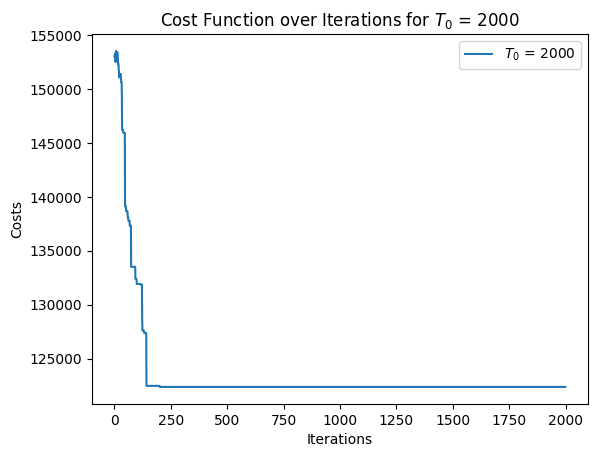

In [68]:
plt.plot(list(range(len(cost_store))), cost_store, label = f"$T_0$ = {T0}")
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.title(f"Cost Function over Iterations for $T_0$ = {T0}")
plt.legend()
plt.show()

In [69]:
print(best_tour)

[31, 38, 6, 0, 33, 22, 19, 27, 18, 29, 14, 8, 25, 26, 17, 21, 1, 5, 30, 37, 40, 47, 3, 28, 11, 7, 39, 46, 9, 34, 44, 45, 10, 41, 12, 43, 24, 13, 2, 32, 36, 15, 20, 42, 16, 35, 4, 23]


In [70]:
best_cost

122368

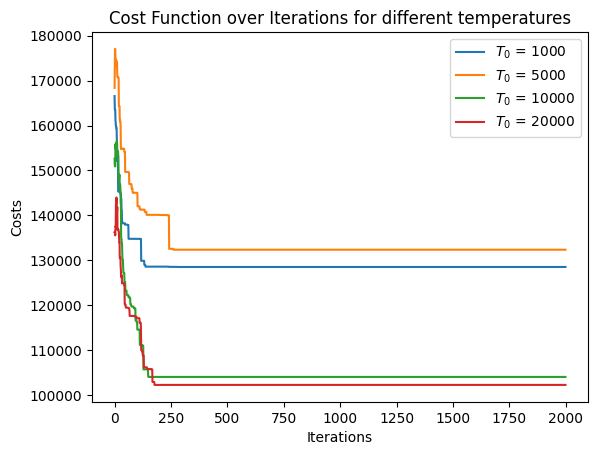

In [71]:
temps = [1000,5000, 10000,20000]
for temp in temps:
  best_tour, best_cost, cost_store = simulated_annealing(temp, 2000)
  plt.plot(list(range(len(cost_store))), cost_store, label = f"$T_0$ = {temp}")
  plt.xlabel("Iterations")
  plt.ylabel("Costs")
plt.title("Cost Function over Iterations for different temperatures")
plt.legend()
plt.show()

We see that 20000 is best among different temperatures choosen

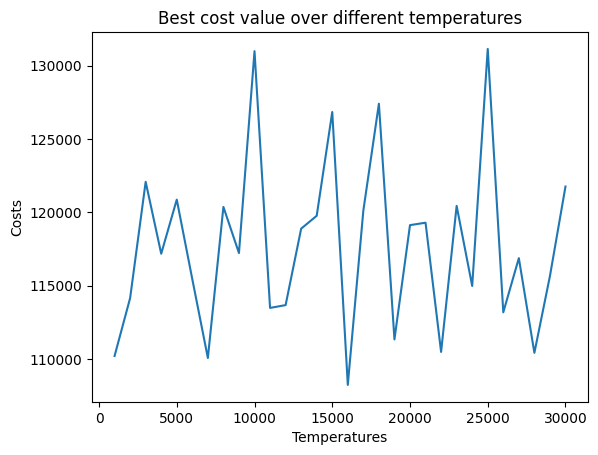

In [72]:
temps = list(range(1000,30001,1000))
temperature_costs = []
for temp in temps:
  best_tour, best_cost, cost_store = simulated_annealing(temp, 2000)
  temperature_costs.append(best_cost)
plt.plot(temps, temperature_costs)
plt.xlabel("Temperatures")
plt.ylabel("Costs")
plt.title("Best cost value over different temperatures")
plt.show()

In [73]:
best_temp = temps[np.argmin(np.array(temperature_costs))]

In [74]:
print(f"Best cost for T0 =  {best_temp} is: ", min(temperature_costs))

Best cost for T0 =  16000 is:  108238


Best temperature we can use is 16000

Now same for linear cooling


In [ ]:
def cooling_schedule2(T0, k, delta):
  return 0.1 + max(T0-k*delta, 0)

In [75]:
def simulated_annealing(T0, max_iter):
  cities = list(range(num_cities))
  current_tour = generate_initial_tour(cities)
  current_cost = cost(current_tour)
  best_tour = current_tour.copy()
  best_cost = current_cost
  T = T0  # initial temperature
  cost_store = []
  for k in range(1, max_iter+1):
    new_tour = neighbour(current_tour)
    new_cost = cost(new_tour)
    T = cooling_schedule2(T0, k, 10)
    if new_cost <= current_cost:
      current_tour = new_tour
      current_cost = new_cost
    else:
      prob = get_acceptance_prob(new_cost, current_cost, T)
      if prob > np.random.rand():
        current_tour = new_tour
        current_cost = new_cost
    if current_cost < best_cost:
      best_cost = current_cost
      best_tour = current_tour
    cost_store.append(current_cost)
  if min(cost_store) != best_cost:
    print(f"Assertion error for temperature {T0}, best cost = {best_cost}, min cost = {min(cost_store)}")
  return best_tour, best_cost, cost_store

In [77]:
best_tour, best_cost, cost_store = simulated_annealing(10000, 2000)

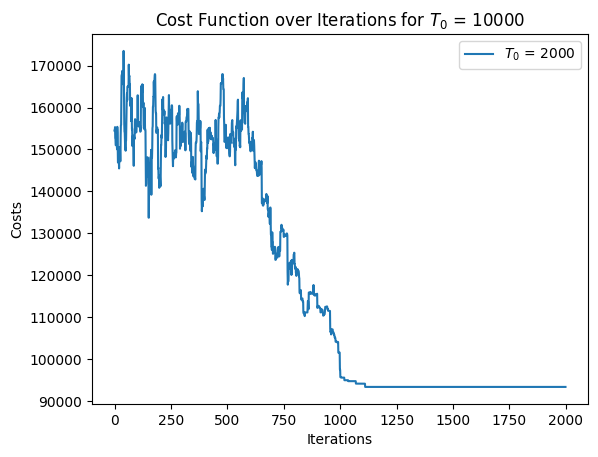

In [81]:
plt.plot(list(range(len(cost_store))), cost_store, label = f"$T_0$ = {T0}")
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.title("Cost Function over Iterations for $T_0$ = 10000")
plt.legend()
plt.show()

I have taken larger temperature initially because if we observe the costs they are in several thousands and the difference is in thousands so the initial temperature must be higher to enable exploration.

In [79]:
print(best_tour)

[27, 8, 37, 6, 42, 21, 40, 33, 38, 25, 3, 46, 22, 39, 7, 35, 36, 16, 44, 9, 41, 2, 12, 20, 19, 26, 5, 43, 13, 47, 24, 45, 17, 30, 10, 1, 15, 11, 32, 14, 0, 28, 4, 34, 23, 31, 29, 18]


In [80]:
best_cost

93349

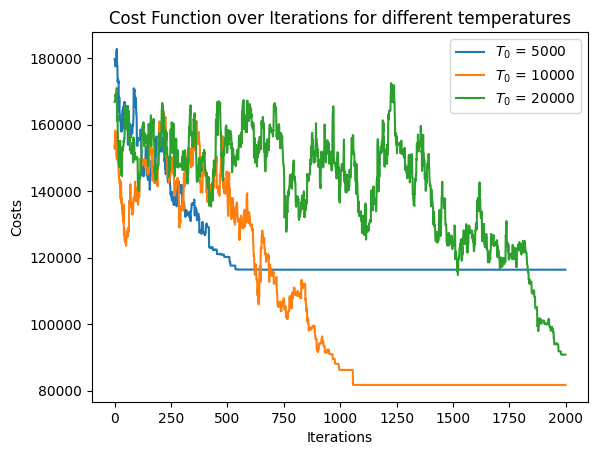

In [82]:
temps = [5000,10000,20000]
for temp in temps:
  best_tour, best_cost, cost_store = simulated_annealing(temp, 2000)
  plt.plot(list(range(len(cost_store))), cost_store, label = f"$T_0$ = {temp}")
  plt.xlabel("Iterations")
  plt.ylabel("Costs")
plt.title("Cost Function over Iterations for different temperatures")
plt.legend()
plt.show()

We see that for T0 = 10000, we can also get the overall best of 80000 cost.

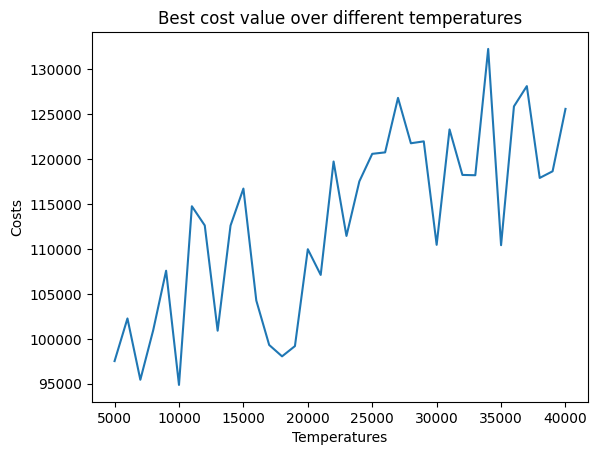

In [87]:
temps = list(range(5000,40001,1000))
temperature_costs = []
for temp in temps:
  best_tour, best_cost, cost_store = simulated_annealing(temp, 2000)
  temperature_costs.append(best_cost)
plt.plot(temps, temperature_costs)
plt.xlabel("Temperatures")
plt.ylabel("Costs")
plt.title("Best cost value over different temperatures")
plt.show()

In [88]:
best_temp = temps[np.argmin(np.array(temperature_costs))]

In [89]:
print(f"Best cost for T0 =  {best_temp} is: ", min(temperature_costs))

Best cost for T0 =  10000 is:  94867


We see that out of all the temperatures, T0 = 10000 is the best for linear cooling case and 48 cities case